<a href="https://colab.research.google.com/github/obbcopper/Python-programs-in-Data-Science/blob/main/HousePriceAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# from google.colab import files
# uploaded = files.upload()

Saving hk_house_data.csv to hk_house_data.csv


In [ ]:
# df = pd.read_csv("/content/hk_house_data.csv")

In [7]:
df = pd.read_csv("hk_house_data.csv")

# Part 2: Data Processing

In [8]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
view,0
condition,0


In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,districts
0,A016427,20190130T000000,51400000.0,4,2,2000,2060,1,0,3,12,2004,0,Sha Tin
1,A001881,20181020T000000,51300000.0,4,3,1970,2070,2,4,3,12,1999,0,Islands
2,A016636,20181020T000000,51200000.0,3,2,1980,2080,2,0,5,12,2014,0,Islands
3,A000022,20181013T000000,51200000.0,5,4,1950,1900,2,3,4,13,2014,0,Islands
4,A001884,20180919T000000,51100000.0,5,4,1960,2060,2,4,3,13,2001,0,Islands


In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,1.087076e+07,3.075880,2.122611,640.026466,740.008421,1.002776,0.234766,3.409430,7.656873,2008.017813,0.840328
std,3.991482e+06,0.779075,0.675757,181.877011,181.761005,0.052617,0.766840,0.650743,1.175459,5.995889,41.172240
min,6.020000e+06,1.000000,1.000000,300.000000,400.000000,1.000000,0.000000,1.000000,1.000000,1998.000000,0.000000
25%,8.495000e+06,3.000000,2.000000,540.000000,640.000000,1.000000,0.000000,3.000000,7.000000,2003.000000,0.000000
50%,9.950000e+06,3.000000,2.000000,618.000000,718.000000,1.000000,0.000000,3.000000,7.000000,2008.000000,0.000000
75%,1.220000e+07,4.000000,3.000000,711.000000,811.000000,1.000000,0.000000,4.000000,8.000000,2013.000000,0.000000
max,5.140000e+07,5.000000,4.000000,2000.000000,2100.000000,2.000000,4.000000,5.000000,13.000000,2018.000000,2018.000000


In [11]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,21604
2018,9


In [12]:
df['yr_built']

,yr_built
0,2004
1,1999
2,2014
3,2014
4,2001
...,...
21608,2000
21609,1999
21610,2018
21611,2009


In [13]:
df['age'] = 2019 - df['yr_built']

# Create state column based on conditions
df['state'] = np.select(
    [df['age'] <= 5, (df['age'] > 5) & (df['age'] <= 10), (df['age'] > 10) & (df['age'] <= 20), df['age'] > 20],
    ['new', 'half_new', 'mid', 'old'],
    default='unknown'
)

df = df.drop(columns=['yr_built'])

In [14]:
df['state'].value_counts()

,count
state,
mid,10998
new,5195
half_new,4661
old,759


In [15]:
d = {'new': 0, 'half_new': 1, 'mid': 2, 'old': 3}
df['state'] = df['state'].map(d)

In [16]:
df['date_datetime'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date_datetime']

df = df.drop(columns=['date'])

In [17]:
df['year'] = df['date_datetime'].dt.year  # Extract year
df['month'] = df['date_datetime'].dt.month  # Extract month
df['year_month'] = df['year'].astype(str) + "-" + df['month'].astype(str)
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')
df['year_month']

df = df.drop(columns=['year','month'])

In [18]:
df['price_per_sqft'] = df['price']/df['sqft_living']
df['price_per_sqft']

,price_per_sqft
0,25700.000000
1,26040.609137
2,25858.585859
3,26256.410256
4,26071.428571
...,...
21608,22656.250000
21609,22656.250000
21610,18828.125000
21611,18812.500000


In [19]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_renovated,districts,age,state,date_datetime,year_month,price_per_sqft
0,A016427,51400000.0,4,2,2000,2060,1,0,3,12,0,Sha Tin,15,2,2019-01-30,2019-01-01,25700.000000
1,A001881,51300000.0,4,3,1970,2070,2,4,3,12,0,Islands,20,2,2018-10-20,2018-10-01,26040.609137
2,A016636,51200000.0,3,2,1980,2080,2,0,5,12,0,Islands,5,0,2018-10-20,2018-10-01,25858.585859
3,A000022,51200000.0,5,4,1950,1900,2,3,4,13,0,Islands,5,0,2018-10-13,2018-10-01,26256.410256
4,A001884,51100000.0,5,4,1960,2060,2,4,3,13,0,Islands,18,2,2018-09-19,2018-09-01,26071.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,A019845,7250000.0,1,1,320,420,1,0,3,7,0,Sha Tin,19,2,2018-06-25,2018-06-01,22656.250000
21609,A019838,7250000.0,1,1,320,420,1,0,3,5,0,Wan Chai,20,2,2018-12-11,2018-12-01,22656.250000
21610,A018947,6025000.0,1,1,320,420,1,0,2,5,0,Wong Tai Sin,1,0,2018-05-08,2018-05-01,18828.125000
21611,A018946,6020000.0,1,1,320,420,1,0,3,6,0,Kwun Tong,10,1,2018-11-05,2018-11-01,18812.500000


In [20]:
def sep_data(data):

    numerics = ['int32','float32','int64','float64']
    num_data = df.select_dtypes(include=numerics)
    cat_data = df.select_dtypes(exclude=numerics)

    return num_data, cat_data

num_data,cat_data = sep_data(df)

In [21]:
# df.to_csv("output.csv")
# from google.colab import files
# download = files.download('output.csv')

#Part 3: Descriptive Analytics

In [22]:
grouped_df = df.groupby(['year_month'])['price_per_sqft'].mean().reset_index()
grouped_df

,year_month,price_per_sqft
0,2018-05-01,17086.370974
1,2018-06-01,17124.911724
2,2018-07-01,17106.585040
3,2018-08-01,16954.027035
4,2018-09-01,17103.167479
5,2018-10-01,16941.261727
6,2018-11-01,16834.920299
7,2018-12-01,16973.568523
8,2019-01-01,17033.747145
9,2019-02-01,16934.059536


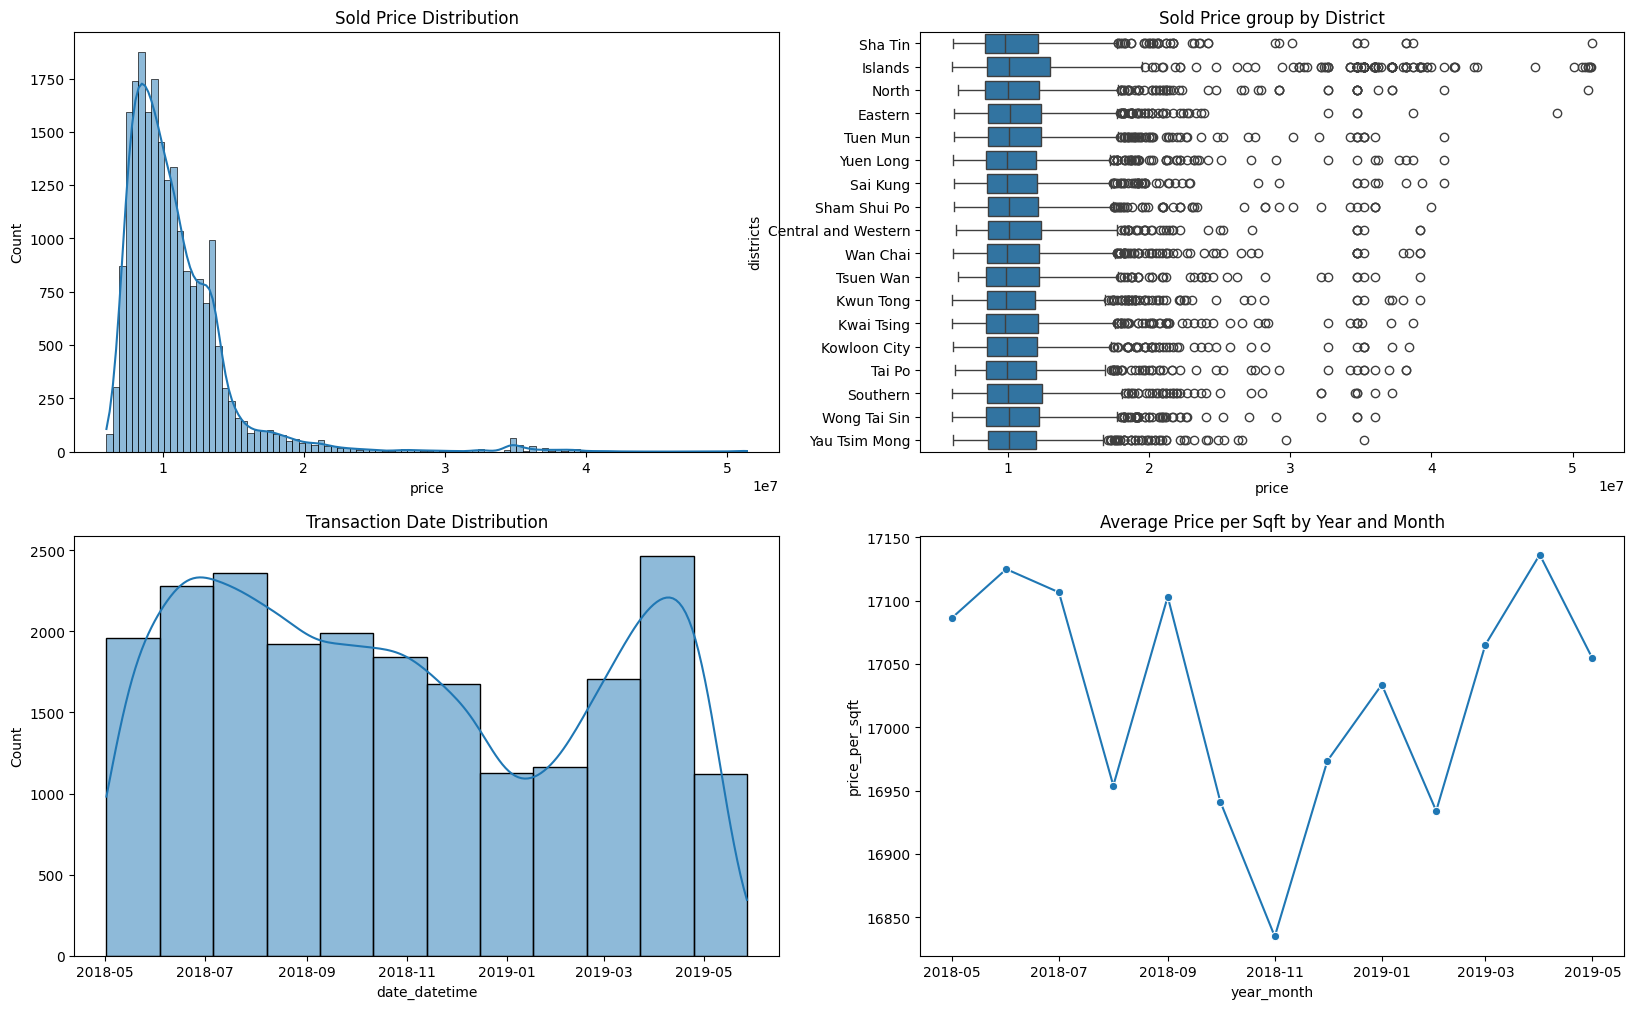

In [23]:
fig,ax = plt.subplots(2,2, figsize=(20,12))

sns.histplot(df['price'], kde=True, bins=100, ax=ax[0,0])
ax[0,0].set_title('Sold Price Distribution')

sns.boxplot(data=df, x="price", y="districts", ax=ax[0,1])
ax[0,1].set_title('Sold Price group by District')

sns.histplot(df['date_datetime'], kde=True, bins=12, ax=ax[1,0])
ax[1,0].set_title('Transaction Date Distribution')

sns.lineplot(data=grouped_df, x='year_month', y='price_per_sqft', marker='o', ax=ax[1,1])
ax[1,1].set_title('Average Price per Sqft by Year and Month')

plt.show()

#Part 4: Diagnostic Analytics

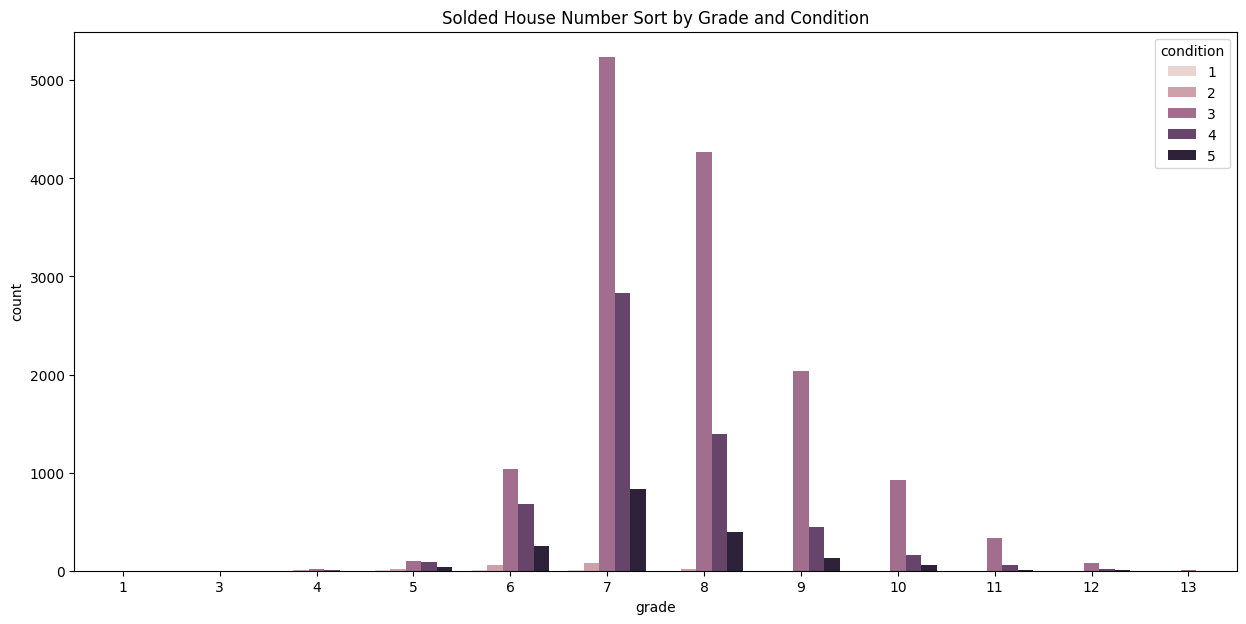

In [24]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=df, x='grade', hue='condition')
plt.title('Solded House Number Sort by Grade and Condition')
plt.show()

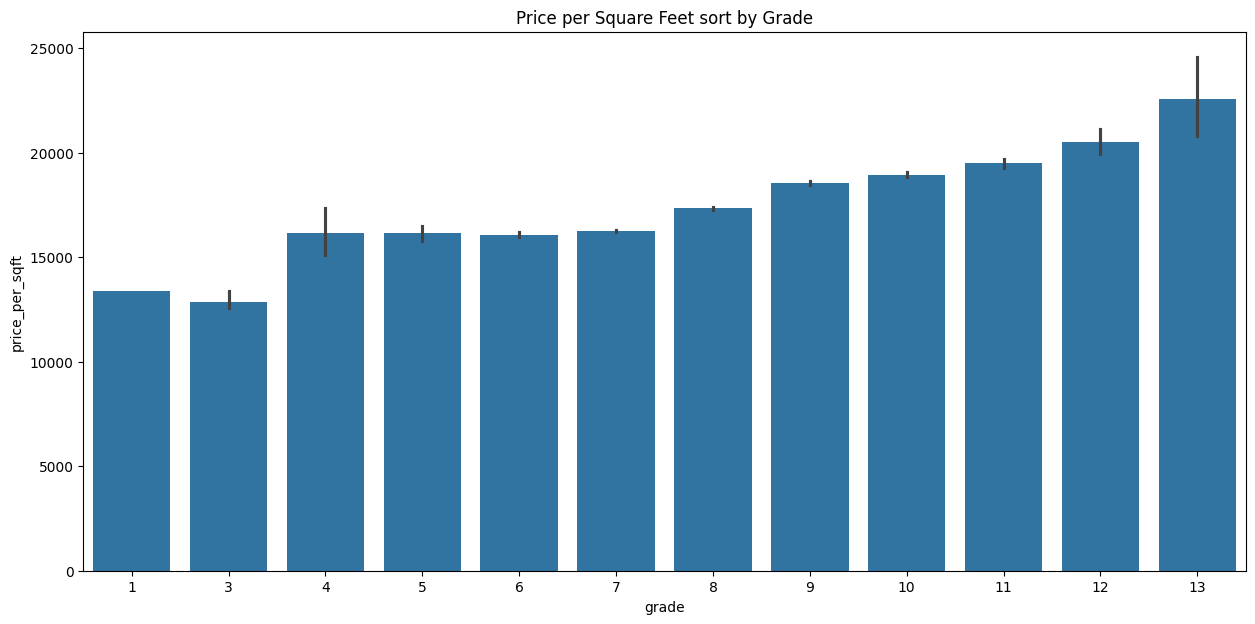

In [25]:
fig = plt.figure(figsize=(15,7))
sns.barplot(data=df, x='grade', y='price_per_sqft')
plt.title('Price per Square Feet sort by Grade')
plt.show()

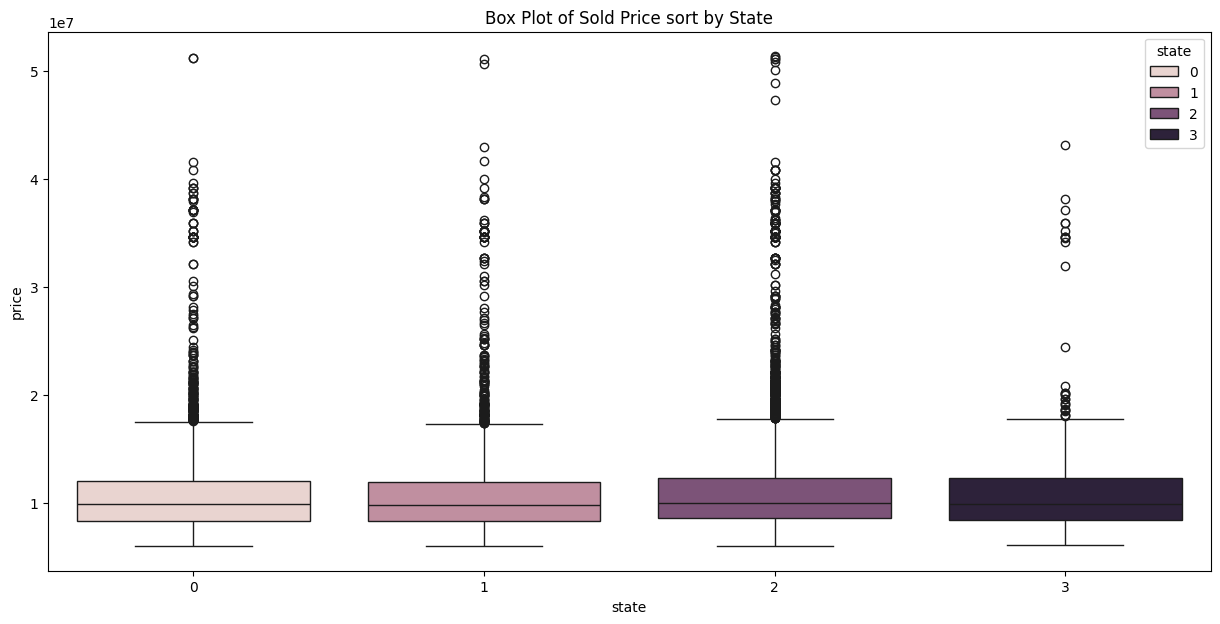

In [26]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='state', y='price', hue='state')
plt.title('Box Plot of Sold Price sort by State')
plt.show()

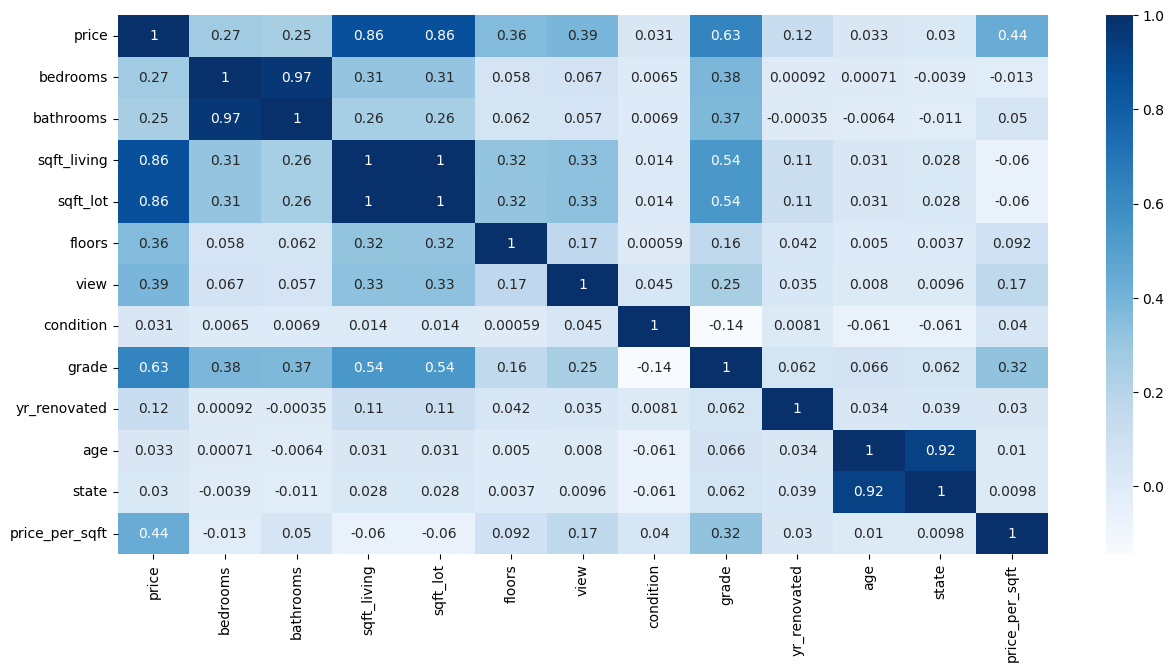

In [27]:
fig = plt.figure(figsize=(15,7))
cor_mat=num_data.corr()
sns.heatmap(cor_mat ,annot = True, cmap='Blues')
plt.show()

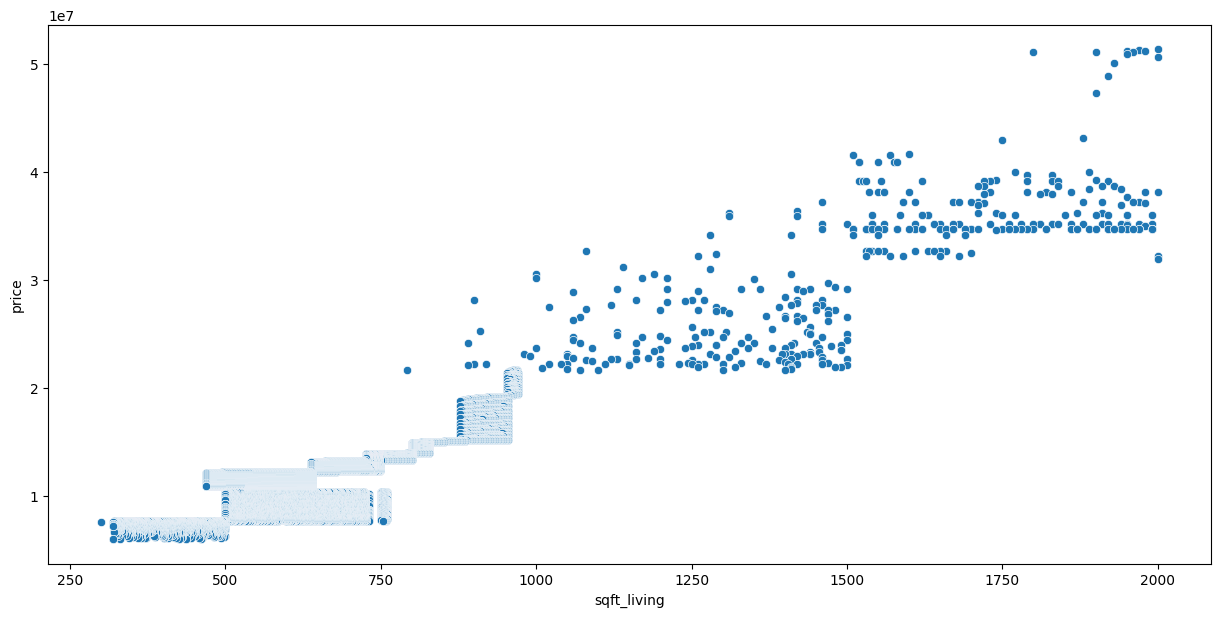

In [28]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.show()

#Part 5: Statistical Test

In [41]:
import scipy.stats
from statsmodels.stats.weightstats import ztest

In [35]:
x = df['grade']
y = df['price']

In [37]:
# In part4 heat map, we notice that the r bewteen the grade and the price of the sold house is 0.63, which is pretty high. So we use hypothesis test to check is this statement true.
print('𝐻0: 𝜌 = 0 vs 𝐻1: 𝜌 ≠ 0 at 𝛼 = 0.05\n𝜌 stand for the population coefficient of correlation.')
r, p_value = scipy.stats.pearsonr(x, y)
print(f"r: {r}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Since p-value < 𝛼, reject the null hypothesis at the 5% level of significance. \nThere is a linear association between grade of the sold house and the price of the sold house.")
else:
    print("Since p-value >= 𝛼, fail to reject the null hypothesis. \nThere is no significant difference in loan approval rates between graduates and non-graduates.")

𝐻0: 𝜌 = 0 vs 𝐻1: 𝜌 ≠ 0 at 𝛼 = 0.05
𝜌 stand for the population coefficient of correlation.
r: 0.6322961340762078
P-value: 0.0
Since p-value < 𝛼, reject the null hypothesis at the 5% level of significance. 
There is a linear association between grade of the sold house and the price of the sold house.


In [38]:
data = df['price_per_sqft'][df['year_month'] == "2018-11-01"]
mean_price_per_sqrt = df['price_per_sqft'].mean()

In [42]:
# In part3, we notice that the mean house price at 2018-11 is much different from the main data set. We use hypothesis test to check is this statement true.
print(f'𝐻0: 𝜇 = {mean_price_per_sqrt} vs 𝐻1: 𝜇 ≠ {mean_price_per_sqrt}\n𝜇 stand for the mean house price at 2018-11.')
z_statistic, p_value = ztest(data, value=mean_price_per_sqrt, alternative='two-sided')
print(f"Z-Statistic: {z_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Since p-value < 𝛼, reject the null hypothesis at the 5% level of significance. \nThe mean house price at 2018-11 is significantly different from the mean house price of the whole dataset.")
else:
    print("Since p-value >= 𝛼, fail to reject the null hypothesis. \nThere is no significant evidence that the mean house price at 2018-11 differs from the the mean house price of the whole dataset.")

𝐻0: 𝜇 = 17036.294324375307 vs 𝐻1: 𝜇 ≠ 17036.294324375307
𝜇 stand for the mean house price at 2018-11.
Z-Statistic: -2.5315
P-Value: 0.0114
Since p-value < 𝛼, reject the null hypothesis at the 5% level of significance. 
The mean house price at 2018-11 is significantly different from the mean house price of the whole dataset.


#Part 6: Machine Learning Methods

In [ ]:
# This part will be update later on

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [44]:
x = df['sqft_living']
y = df['price']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [46]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

[-1329279.78616286]
[[19075.09067984]]


In [48]:
house_size = 300
price = linreg.intercept_ +house_size*linreg.coef_
linreg.predict([[house_size]])

array([[4393247.41778779]])